Merge de los archivos

In [58]:
#iMPORTAR ARCHIVOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
df_demograficos = pd.read_csv("/content/datosdemograficos_limpio.csv", sep=',', decimal='.')
df_perfomance = pd.read_csv("/content/performancelimpio.csv", sep=',', decimal='.')
df_previous = pd.read_csv("/content/previous_loan_limpio.csv", sep=',', decimal='.')

In [59]:
# lo he hecho en 2 pasos porq en 1 daba error. https://stackoverflow.com/questions/54930427/valueerror-while-doing-merge-with-dataframes-using-pandas
df = pd.merge(df_demograficos, df_perfomance,on='customerid')
df = pd.merge(df, df_previous,on='customerid')
df

,customerid,age,Other,Savings,Diamond Bank,EcoBank,FCMB,Fidelity Bank,First Bank,GT Bank,...,loanamount,totaldue,termdays,totalamountreturn,interestrate,loannumberprevious,loanamountprevious,totaldueprevious,termdaysprevious,datediffsecondsprevious
0,8a858e135cb22031015cbafc76964ebd,48,0,1,0,0,0,0,0,1,...,100000000,130000000.0,30,30000000.0,23.076923,1.0,100000000.0,115000000.0,15.0,3667.000000
1,8a858e275c7ea5ec015c82482d7c3996,36,0,1,0,0,0,0,0,0,...,100000000,130000000.0,30,30000000.0,23.076923,1.0,100000000.0,130000000.0,30.0,3668.000000
2,8a858e5b5bd99460015bdc95cd485634,35,0,1,0,0,0,1,0,0,...,100000000,130000000.0,30,30000000.0,23.076923,2.0,100000000.0,120000000.0,20.0,3611.666667
3,8a858efd5ca70688015cabd1f1e94b55,30,0,1,0,0,0,0,0,1,...,100000000,115000000.0,15,15000000.0,13.043478,1.0,100000000.0,115000000.0,15.0,3668.000000
4,8a858e785acd3412015acd48f4920d04,39,0,1,0,0,0,0,0,1,...,20000,22250.0,15,2250.0,10.112360,3.0,120000000.0,135750000.0,15.0,3631.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,8a858fc25bafabdc015bb47fda0323e5,46,0,1,0,0,0,0,0,1,...,200000000,222500000.0,15,22500000.0,10.112360,2.0,100000000.0,120000000.0,20.0,3608.666667
5812,8a858e245c214660015c3397e4db389a,31,0,1,0,0,0,0,0,1,...,100000000,115000000.0,15,15000000.0,13.043478,1.5,100000000.0,115000000.0,15.0,3637.500000
5813,8a858e8b5bc9e7e6015bcd7374077f0c,33,0,1,0,0,0,0,1,0,...,100000000,130000000.0,30,30000000.0,23.076923,1.5,100000000.0,130000000.0,30.0,5161.500000
5814,8a858f2e5c699f3a015c77aa22ed7f23,48,0,1,0,0,1,0,0,0,...,100000000,115000000.0,15,15000000.0,13.043478,1.0,100000000.0,115000000.0,15.0,3614.000000


In [60]:
df.drop(['customerid'], axis=1, inplace = True)


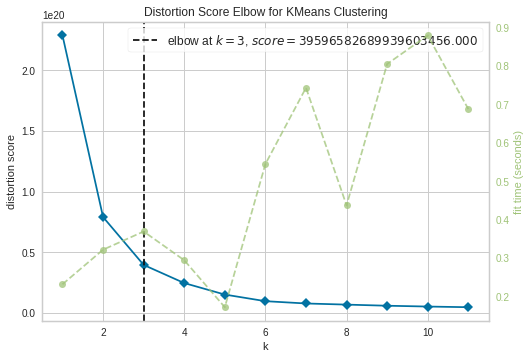

In [61]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)

In [63]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 1446, 1: 449, 2: 2543, 3: 1378})

In [65]:
df['index'] = df.index
df

,age,Other,Savings,Diamond Bank,EcoBank,FCMB,Fidelity Bank,First Bank,GT Bank,Heritage Bank,...,totaldue,termdays,totalamountreturn,interestrate,loannumberprevious,loanamountprevious,totaldueprevious,termdaysprevious,datediffsecondsprevious,index
0,48,0,1,0,0,0,0,0,1,0,...,130000000.0,30,30000000.0,23.076923,1.0,100000000.0,115000000.0,15.0,3667.000000,0
1,36,0,1,0,0,0,0,0,0,0,...,130000000.0,30,30000000.0,23.076923,1.0,100000000.0,130000000.0,30.0,3668.000000,1
2,35,0,1,0,0,0,1,0,0,0,...,130000000.0,30,30000000.0,23.076923,2.0,100000000.0,120000000.0,20.0,3611.666667,2
3,30,0,1,0,0,0,0,0,1,0,...,115000000.0,15,15000000.0,13.043478,1.0,100000000.0,115000000.0,15.0,3668.000000,3
4,39,0,1,0,0,0,0,0,1,0,...,22250.0,15,2250.0,10.112360,3.0,120000000.0,135750000.0,15.0,3631.600000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,46,0,1,0,0,0,0,0,1,0,...,222500000.0,15,22500000.0,10.112360,2.0,100000000.0,120000000.0,20.0,3608.666667,5811
5812,31,0,1,0,0,0,0,0,1,0,...,115000000.0,15,15000000.0,13.043478,1.5,100000000.0,115000000.0,15.0,3637.500000,5812
5813,33,0,1,0,0,0,0,1,0,0,...,130000000.0,30,30000000.0,23.076923,1.5,100000000.0,130000000.0,30.0,5161.500000,5813
5814,48,0,1,0,0,1,0,0,0,0,...,115000000.0,15,15000000.0,13.043478,1.0,100000000.0,115000000.0,15.0,3614.000000,5814


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.factorplot(x='df', y='Value', data=df, hue=kmeans.labels_)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: ignored